In [7]:
import torch
from kogpt2.pytorch_kogpt2 import get_pytorch_kogpt2_model
from sentencepiece import SentencePieceProcessor as sp
from kogpt2.utils import get_tokenizer

In [8]:
tok_path = get_tokenizer()

using cached model


In [6]:
tok_path

'/home/jhm9507/kogpt2/kogpt2_news_wiki_ko_cased_818bfa919d.spiece'

In [9]:
tokenizer = sp(tok_path)

In [8]:
tokenizer.EncodeAsPieces("이것은 테스트 문장입니다. This is text example...")

['▁이것은',
 '▁테스트',
 '▁문장',
 '입니다',
 '.',
 '▁Th',
 'is',
 '▁is',
 '▁',
 'text',
 '▁e',
 'x',
 'amp',
 'le',
 '...']

In [9]:
model, vocab = get_pytorch_kogpt2_model()

using cached model
using cached model


In [10]:
tokenizer.EncodeAsIds("이것은 테스트 문장입니다. This is text example... ; Summary:")

[5983,
 5054,
 24680,
 484,
 47440,
 22047,
 520,
 6213,
 47437,
 9668,
 3276,
 48038,
 19088,
 622,
 218,
 23416,
 34375,
 2024,
 14184,
 47820]

In [11]:
tokenizer.DecodeIds(tokenizer.EncodeAsIds("이것은 테스트 문장입니다. This is text example... ; Summary:"))

'이것은 테스트 문장입니다. This is text example... ; Summary:'

In [12]:
words = "2019년 한해를 보내며,"
words = tokenizer.EncodeAsIds(words)
while True:
    inputs = torch.tensor([0] + words).unsqueeze(dim=0)
    pred = model(inputs)[0]
    word = pred[:, -1, :].argmax(dim=-1)
    print(tokenizer.DecodeIds(word.tolist()))
    word = word[0]
    if word == 1:
        break
    words.append(word.item())
words = tokenizer.DecodeIds(words)
words

새해
에는
더
많은
사람들이
새해
에
이루고
자
하는
소망
과
희망을
되새
겨
보는
시간이
되었
으면
좋겠다
.



'2019년 한해를 보내며, 새해에는 더 많은 사람들이 새해에 이루고자 하는 소망과 희망을 되새겨보는 시간이 되었으면 좋겠다.'

In [13]:
voca = vocab.to_json()

In [14]:
import json
voca = json.loads(voca)

In [15]:
with open("assets/vocab.txt", "w") as f:
    for word in voca["idx_to_token"]:
        f.write(word+"\n")

In [16]:
data = json.load(open("data/NIKL_SC.json", "r", encoding="utf-8"))

In [17]:
len(data["data"])

4389

In [18]:
data["data"][0]

{'document_id': 'NWRW1800000021.6',
 'subclass': 'NA',
 'head': '與, 쟁점법안 대폭후퇴 끝 타결',
 'subhead': '',
 'topic_sentences': ['여야가 6일 임시국회 종료 이틀을 남기고 주요 쟁점법안 처리 문제를 일괄 타결했다.',
  '이로써 지난해 12월 10일 개회 이래 4주 동안 야당의 본회의장 불법 점거와 국회의장의 질서유지권 발동 등으로 가파르게 대치했던 정국이 정상화됐다.',
  '여야는 최대 쟁점이었던 미디어 관계 법안 8건 중 언론중재법 등 여야 간 이견이 없는 법안 2건만 이번 임시국회에서 협의 처리하고 신문·방송 겸영 허용과 대기업 방송 진출 허용 등 여야가 맞서는 6개 법안은 이른 시일 안에 합의 처리하도록 노력하기로 했다.'],
 'summary_sentences': ['한나라당 홍준표, 민주당 원혜영, 선진과 창조의 모임 문국현 원내대표는 6일 임시국회 종료 이틀을 남기고 미디어 관계 법 등 쟁점 법안 처리 방안 10개 항에 합의했다.',
  '여야는 여야 간 이견이 없는 언론중재법 등 2건만 이번에 협의 처리하고 신문·방송 겸영과 대기업 방송 진출 허용 등과 관련한 6개 쟁점 법안은 가능한 한 빨리 합의 처리하기로 했다.',
  '이로써 지난해 12월 10일 개회한 후 4주 동안 야당의 본회의장 불법 점거와 국회의장의 질서유지권 발동 등으로 대치했던 정국이 정상화됐다.']}

In [19]:
doc_ids = []

In [20]:
for row in data["data"]:
    doc_id = row["document_id"].split(".")[0]
    if doc_id not in doc_ids:
        doc_ids.append(doc_id)

In [21]:
set(doc_ids)

{'NWRW1800000021',
 'NWRW1800000022',
 'NWRW1800000024',
 'NWRW1800000025',
 'NWRW1800000026',
 'NWRW1800000028',
 'NWRW1800000029',
 'NWRW1800000030',
 'NWRW1800000032',
 'NWRW1800000033',
 'NWRW1800000034',
 'NWRW1800000036',
 'NWRW1800000037',
 'NWRW1800000038',
 'NWRW1800000040',
 'NWRW1800000041',
 'NWRW1800000042',
 'NWRW1800000044',
 'NWRW1800000045',
 'NWRW1800000046',
 'NWRW1800000048',
 'NWRW1800000049',
 'NWRW1800000050',
 'NWRW1800000052',
 'NWRW1800000053',
 'NWRW1800000054',
 'NWRW1800000056'}

In [22]:
import glob

news = {}
for doc_name in glob.glob("data/news/*.json"):
    doc = json.load(open(doc_name, "r", encoding="utf-8"))
    for sub_doc in doc["document"]:
        doc_id = sub_doc["id"]
        news[doc_id] = sub_doc

In [23]:
news

{'NWRW1800000026.1': {'id': 'NWRW1800000026.1',
  'metadata': {'title': '조선일보 2010년 기사',
   'author': '송의달',
   'publisher': '조선일보사',
   'date': '20100101',
   'topic': 'NA',
   'original_topic': '오피니언'},
  'paragraph': [{'id': 'NWRW1800000026.1.1', 'form': '[만물상] 무기중개상'},
   {'id': 'NWRW1800000026.1.2',
    'form': '사우디아라비아 출신 무기중개상 아드난 카쇼기가 1976년 영국 한 호텔에서 파티를 열었다. 키신저 당시 미 국무장관, 여러 나라의 아랍 왕족 등이 참석했다. 카쇼기는 파티가 끝난 후 안내역으로 미국에서 불러온 아르바이트생 동양 여성에게 "내 회사에서 파트타임으로 일할 생각은 없느냐"고 했다. 20여년 뒤 한국에서 군 정찰기 도입 로비를 하다 현직 국방장관과 \'연서(戀書) 스캔들\'을 일으킨 재미 무기중개상 린다 김이었다.'},
   {'id': 'NWRW1800000026.1.3',
    'form': '▶1981년 카쇼기는 린다 김에게 "한국에 가서 박종규 전 대통령 경호실장을 데려와 보라"고 했다. 박씨는 당시 한국 신군부 실세들의 \'어른\'이었다. 린다 김은 도미(渡美) 전 서울 사교계 생활에서 쌓은 친분을 살려 카쇼기가 낸 이 과제를 거뜬히 해결했다.'},
   {'id': 'NWRW1800000026.1.4',
    'form': '▶미국 노드롭사는 F-20 전투기 판매 로비 자금으로 625만달러를 받고도 로비에 실패했다며 1986년 박종규씨를 상대로 돈을 돌려달라는 소송을 냈다. 검찰 수사에서 박씨 측근이 350만달러를 받아 유용한 사실은 밝혀졌지만 박씨는 85년 이미 사망해 그의 돈 수수 사실은 규명되지 않았다. 이 사건을 계기로 무기구매액의 1~3%가 커미션으로 오간다는 사실이 

In [24]:
processed = {}

In [25]:
for row in data["data"]:
    doc_id = row["document_id"]
    try:
        doc = news[doc_id]
        new_data = {}
        new_data["document"] = []
        for para in doc["paragraph"]:
            new_data["document"].append(para["form"])
        new_data["document"] = " ".join(new_data["document"])
        new_data["summary"] = " ".join(row["summary_sentences"])
        processed[doc_id] = new_data
    except:
        pass

In [26]:
processed["NWRW1800000021.6"]

{'document': '與, 쟁점법안 대폭후퇴 끝 타결 여야가 6일 임시국회 종료 이틀을 남기고 주요 쟁점법안 처리 문제를 일괄 타결했다. 이로써 지난해 12월 10일 개회 이래 4주 동안 야당의 본회의장 불법 점거와 국회의장의 질서유지권 발동 등으로 가파르게 대치했던 정국이 정상화됐다. ▶A3·4·5·6면에 관련기사 한나라당 홍준표, 민주당 원혜영, 선진과 창조의 모임 문국현 원내대표는 이날 국회 귀빈식당에서 원내대표 회담을 두 차례 열어 미디어 관계 법안 등 쟁점 법안의 처리 방안에 대한 10개 항에 합의했다. 여야는 이견이 없는 민생법안 등 100여 건을 이번 임시국회에서 협의 처리하되 아직 상임위원회에 상정되지 않았거나 심의를 거치지 못한 법안은 9일 다시 임시국회를 열어 처리하기로 했다. 그러나 여야는 이날 합의에서 상당수 쟁점법안의 처리 시기는 물론이고 법안 상정 여부조차 정하지 못해 2월 1일 열리는 임시국회에서 이를 둘러싼 ‘제2차 입법전쟁’이 벌어질 가능성이 높다. 여야는 최대 쟁점이었던 미디어 관계 법안 8건 중 언론중재법 등 여야 간 이견이 없는 법안 2건만 이번 임시국회에서 협의 처리하고 신문·방송 겸영 허용과 대기업 방송 진출 허용 등 여야가 맞서는 6개 법안은 이른 시일 안에 합의 처리하도록 노력하기로 했다. 한미 자유무역협정(FTA) 비준동의안은 미국 차기 행정부가 출범(이달 20일)한 뒤 이른 시일 안에 협의 처리하기로 했다. 출자총액제한제도 폐지 법안은 이번 임시국회에서 상임위원회에 상정하되 2월 임시국회에서 협의 처리하고 금산분리 완화 법안 역시 이번 임시국회에서 상정하되 여야가 합의 처리하도록 노력하기로 했다. 재외국민에게 대선과 총선의 투표권을 부여하는 내용의 공직선거법 개정안은 여야 동수로 정치개혁특별위원회를 구성해 2월 임시국회에서 합의 처리하기로 했다. 이에 앞서 민주당은 이날 오전 국회 본회의장과 행정안전위, 정무위 회의장 점거 농성을 풀었다. 민주당은 7일엔 문화체육관광방송통신위 회의장에서 철수하기로 했다. 김형오

In [27]:
with open("data/data.json", "w", encoding="utf-8") as f:
    json.dump(processed, f, indent=2, ensure_ascii=False)

In [28]:
ids = list(processed.keys())
len(ids)

4387

In [29]:
train_ids = []
dev_ids = []
for id in ids[:-400]:
    train_ids.append(id)
for id in ids[-400:]:
    dev_ids.append(id)

In [30]:
train_data = {}
dev_data = {}
for id, row in processed.items():
    if id in train_ids:
        train_data[id] = row
    else:
        dev_data[id] = row

In [31]:
with open("data/train_data.json", "w") as f:
    json.dump(train_data, f, indent=2, ensure_ascii=False)
with open("data/dev_data.json", "w") as f:
    json.dump(dev_data, f, indent=2, ensure_ascii=False)

In [32]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50000, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [33]:
processed

{'NWRW1800000021.6': {'document': '與, 쟁점법안 대폭후퇴 끝 타결 여야가 6일 임시국회 종료 이틀을 남기고 주요 쟁점법안 처리 문제를 일괄 타결했다. 이로써 지난해 12월 10일 개회 이래 4주 동안 야당의 본회의장 불법 점거와 국회의장의 질서유지권 발동 등으로 가파르게 대치했던 정국이 정상화됐다. ▶A3·4·5·6면에 관련기사 한나라당 홍준표, 민주당 원혜영, 선진과 창조의 모임 문국현 원내대표는 이날 국회 귀빈식당에서 원내대표 회담을 두 차례 열어 미디어 관계 법안 등 쟁점 법안의 처리 방안에 대한 10개 항에 합의했다. 여야는 이견이 없는 민생법안 등 100여 건을 이번 임시국회에서 협의 처리하되 아직 상임위원회에 상정되지 않았거나 심의를 거치지 못한 법안은 9일 다시 임시국회를 열어 처리하기로 했다. 그러나 여야는 이날 합의에서 상당수 쟁점법안의 처리 시기는 물론이고 법안 상정 여부조차 정하지 못해 2월 1일 열리는 임시국회에서 이를 둘러싼 ‘제2차 입법전쟁’이 벌어질 가능성이 높다. 여야는 최대 쟁점이었던 미디어 관계 법안 8건 중 언론중재법 등 여야 간 이견이 없는 법안 2건만 이번 임시국회에서 협의 처리하고 신문·방송 겸영 허용과 대기업 방송 진출 허용 등 여야가 맞서는 6개 법안은 이른 시일 안에 합의 처리하도록 노력하기로 했다. 한미 자유무역협정(FTA) 비준동의안은 미국 차기 행정부가 출범(이달 20일)한 뒤 이른 시일 안에 협의 처리하기로 했다. 출자총액제한제도 폐지 법안은 이번 임시국회에서 상임위원회에 상정하되 2월 임시국회에서 협의 처리하고 금산분리 완화 법안 역시 이번 임시국회에서 상정하되 여야가 합의 처리하도록 노력하기로 했다. 재외국민에게 대선과 총선의 투표권을 부여하는 내용의 공직선거법 개정안은 여야 동수로 정치개혁특별위원회를 구성해 2월 임시국회에서 합의 처리하기로 했다. 이에 앞서 민주당은 이날 오전 국회 본회의장과 행정안전위, 정무위 회의장 점거 농성을 풀었다. 민주당은 7일엔 문화체육관광방송통신

In [41]:
summary_lens = []
for dial_id, dial in processed.items():
    summary_lens.append(len(tokenizer.EncodeAsIds(dial["summary"])))

In [42]:
import numpy as np
np.array(summary_lens).mean()

87.77524504217004

In [43]:
max(summary_lens)

173

In [3]:
from matplotlib import pyplot as plt

In [5]:
import json
data = json.load(open("data/data.json", "r"))

In [10]:
summary_lens = []
for dial_id, dial in data.items():
    summary_lens.append(len(tokenizer.EncodeAsIds(dial["summary"])))

(array([  3.,  11.,  30.,  58.,  93.,  83., 181., 215., 278., 311., 419.,
        338., 432., 411., 398., 298., 228., 179., 144.,  88.,  77.,  40.,
         21.,  19.,  18.,   5.,   3.,   3.,   2.,   1.]),
 array([ 28.        ,  32.83333333,  37.66666667,  42.5       ,
         47.33333333,  52.16666667,  57.        ,  61.83333333,
         66.66666667,  71.5       ,  76.33333333,  81.16666667,
         86.        ,  90.83333333,  95.66666667, 100.5       ,
        105.33333333, 110.16666667, 115.        , 119.83333333,
        124.66666667, 129.5       , 134.33333333, 139.16666667,
        144.        , 148.83333333, 153.66666667, 158.5       ,
        163.33333333, 168.16666667, 173.        ]),
 <BarContainer object of 30 artists>)

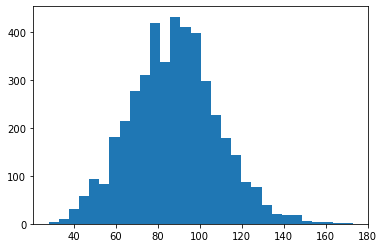

In [13]:
plt.hist(summary_lens, bins=30)